In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns# Carregando dataset
import  time


Random com região

In [20]:
data = pd.read_csv("./Base/Base_Completa.csv'", sep = ';', encoding = 'iso-8859-1', squeeze = True, low_memory=False)
df = data
data.shape
print(len(df))
print(data.shape)
print("kim")

df = df[df.TAXA_PARTICIPACAO_5EF!=0]

q1 = df['MEDIA_TOTAL_5EF'].quantile(q=0.25)
print(q1)
q4 = df['MEDIA_TOTAL_5EF'].quantile(q=0.75)


df1Q = df[df['MEDIA_TOTAL_5EF']<q1]
df4Q = df[df['MEDIA_TOTAL_5EF']>q4]

df1Q.loc[:,'ROTULO'] = 0
df4Q.loc[:,'ROTULO'] = 1

print(df.shape)
treino_base_LP = pd.concat([df4Q , df1Q])


73674
(73674, 258)
kim
194.61
(47771, 258)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


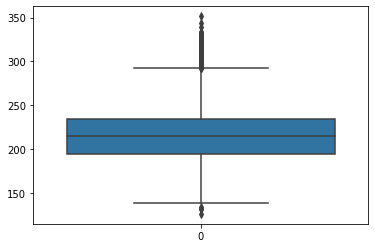

In [21]:
sns.boxplot(data=df['MEDIA_TOTAL_5EF'])


In [22]:
atributos = ['IN_AGUA_FILTRADA','IN_AGUA_REDE_PUBLICA','IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA'
,'IN_AGUA_FONTE_RIO','IN_AGUA_INEXISTENTE','IN_ENERGIA_REDE_PUBLICA','IN_ENERGIA_GERADOR'
,'IN_ENERGIA_OUTROS','IN_ENERGIA_INEXISTENTE','IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA'
,'IN_ESGOTO_INEXISTENTE','IN_LIXO_COLETA_PERIODICA','IN_LIXO_QUEIMA'
,'IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_RECICLA','IN_LIXO_ENTERRA','IN_LIXO_OUTROS'
,'IN_SALA_DIRETORIA','IN_SALA_PROFESSOR','IN_LABORATORIO_INFORMATICA'
,'IN_LABORATORIO_CIENCIAS','IN_SALA_ATENDIMENTO_ESPECIAL','IN_QUADRA_ESPORTES_COBERTA'
,'IN_QUADRA_ESPORTES_DESCOBERTA','IN_QUADRA_ESPORTES','IN_COZINHA','IN_BIBLIOTECA'
,'IN_SALA_LEITURA','IN_BIBLIOTECA_SALA_LEITURA','IN_PARQUE_INFANTIL','IN_BERCARIO'
,'IN_BANHEIRO_FORA_PREDIO'
,'IN_BANHEIRO_DENTRO_PREDIO'
,'IN_BANHEIRO_EI'
,'IN_BANHEIRO_PNE'
,'IN_DEPENDENCIAS_PNE'
,'IN_SECRETARIA'
,'IN_BANHEIRO_CHUVEIRO'
,'IN_REFEITORIO'
,'IN_DESPENSA'
,'IN_ALMOXARIFADO'
,'IN_AUDITORIO'
,'IN_PATIO_COBERTO'
,'IN_PATIO_DESCOBERTO'
,'IN_ALOJAM_ALUNO'
,'IN_ALOJAM_PROFESSOR'
,'IN_AREA_VERDE'
,'IN_LAVANDERIA'
,'IN_DEPENDENCIAS_OUTRAS'
,'QT_SALAS_EXISTENTES'
,'QT_SALAS_UTILIZADAS'
,'IN_EQUIP_TV'
,'IN_EQUIP_VIDEOCASSETE'
,'IN_EQUIP_DVD'
,'IN_EQUIP_PARABOLICA'
,'IN_EQUIP_COPIADORA'
,'IN_EQUIP_RETROPROJETOR'
,'IN_EQUIP_IMPRESSORA'
,'IN_EQUIP_IMPRESSORA_MULT'
,'IN_EQUIP_SOM'
,'IN_EQUIP_MULTIMIDIA'
,'IN_EQUIP_FAX'
,'IN_EQUIP_FOTO'
,'IN_COMPUTADOR'
,'QT_EQUIP_TV'
,'QT_EQUIP_VIDEOCASSETE'
,'QT_EQUIP_DVD'
,'QT_EQUIP_PARABOLICA'
,'QT_EQUIP_COPIADORA'
,'QT_EQUIP_RETROPROJETOR'
,'QT_EQUIP_IMPRESSORA'
,'QT_EQUIP_IMPRESSORA_MULT'
,'QT_EQUIP_SOM'
,'QT_EQUIP_MULTIMIDIA'
,'QT_EQUIP_FAX'
,'QT_EQUIP_FOTO'
,'QT_COMPUTADOR'
,'QT_COMP_ADMINISTRATIVO'
,'QT_COMP_ALUNO'
,'IN_INTERNET'
,'IN_BANDA_LARGA'
,'QT_FUNCIONARIOS'
,'IN_ALIMENTACAO'
,'TP_AEE'
,'TP_ATIVIDADE_COMPLEMENTAR'
,'IN_FUNDAMENTAL_CICLOS'
,'TP_LOCALIZACAO_DIFERENCIADA'
,'IN_MATERIAL_ESP_QUILOMBOLA'
,'IN_MATERIAL_ESP_INDIGENA'
,'IN_MATERIAL_ESP_NAO_UTILIZA'
,'IN_EDUCACAO_INDIGENA'
,'TP_INDIGENA_LINGUA'
,'CO_LINGUA_INDIGENA'
,'IN_BRASIL_ALFABETIZADO'
,'IN_FINAL_SEMANA'
,'IN_FORMACAO_ALTERNANCIA'
,'IN_MEDIACAO_PRESENCIAL'
,'IN_MEDIACAO_SEMIPRESENCIAL'
,'IN_MEDIACAO_EAD'
,'IN_ESPECIAL_EXCLUSIVA'
,'IN_REGULAR'
,'IN_EJA'
,'IN_PROFISSIONALIZANTE'
,'IN_COMUM_CRECHE'
,'IN_COMUM_PRE'
,'IN_COMUM_FUND_AI'
,'IN_COMUM_FUND_AF'
,'IN_COMUM_MEDIO_MEDIO'
,'IN_COMUM_MEDIO_INTEGRADO'
,'IN_COMUM_MEDIO_NORMAL'
,'IN_ESP_EXCLUSIVA_CRECHE'
,'IN_ESP_EXCLUSIVA_PRE'
,'IN_ESP_EXCLUSIVA_FUND_AI'
,'IN_ESP_EXCLUSIVA_FUND_AF'
,'IN_ESP_EXCLUSIVA_MEDIO_MEDIO'
,'IN_ESP_EXCLUSIVA_MEDIO_INTEGR'
,'IN_ESP_EXCLUSIVA_MEDIO_NORMAL'
,'IN_COMUM_EJA_FUND'
,'IN_COMUM_EJA_MEDIO'
,'IN_COMUM_EJA_PROF'
,'IN_ESP_EXCLUSIVA_EJA_FUND'
,'IN_ESP_EXCLUSIVA_EJA_MEDIO'
,'IN_ESP_EXCLUSIVA_EJA_PROF'
,'IN_COMUM_PROF'
,'IN_ESP_EXCLUSIVA_PROF'
,'CO_UF', 'CO_REGIAO', 'TAXA_PARTICIPACAO_5EF']
print(len(atributos))

X = treino_base_LP.loc[:, atributos ].values
y = treino_base_LP.loc[:,'ROTULO'].values


#df['rotulo'] = list(map(lambda x : 1 if x>300 else 0, df.loc[:,'MEDIA_TOTAL_5EF']))
#y = df['rotulo']

130


In [0]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [0]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [25]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Predicting the test set results
#%%timeit
Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(cm)
print(classification_report(Y_Test, Y_Pred))
#print("\n Acurácia treinamento : %.2f%%" %accuracy_score(Y_Test, Y_Pred) * 100)

[[3244  296]
 [ 516 3108]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3540
           1       0.91      0.86      0.88      3624

    accuracy                           0.89      7164
   macro avg       0.89      0.89      0.89      7164
weighted avg       0.89      0.89      0.89      7164



In [0]:
#testando validação cruzada e consequencias do aumento de estimadores na acurácia

In [0]:
from sklearn.model_selection import validation_curve
param_range = [10, 50, 100, 200,300,400,500,800,1000,1500]
crossvalidation = KFold(n_splits=3,shuffle=True,random_state=1)
RF_cls = RandomForestClassifier(n_estimators=200,random_state=0)
train_scores, test_scores = validation_curve(RF_cls, X, y,
'n_estimators',
param_range=param_range,
cv=crossvalidation,
scoring='accuracy')
mean_test_scores = np.mean(test_scores, axis=1)

[0.87896302 0.88754869 0.88779997 0.88809314 0.88834443 0.88880513
 0.88834443 0.88859572 0.88880513 0.88813503]


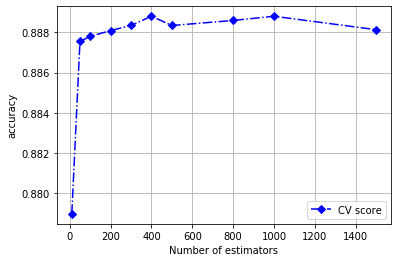

In [31]:
import matplotlib.pyplot as plt
plt.plot(param_range, mean_test_scores,
'bD-.', label='CV score')
plt.grid()
plt.xlabel('Number of estimators')
plt.ylabel('accuracy')
print(mean_test_scores)
plt.legend(loc='lower right', numpoints= 1)
plt.show()

In [0]:
#testando agora os melhores parâmetros

In [33]:
crossvalidation = KFold(n_splits=5, shuffle=True,
random_state=1)
RF_cls = RandomForestClassifier(random_state=1)
score = np.mean(cross_val_score(RF_cls, X, y,
scoring='accuracy',
cv=crossvalidation))
print('Accuracy: %.3f' % score)
#print('Accuracy: %.3f' % score)
scorer = 'accuracy'

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Accuracy: 0.881


In [34]:
from sklearn.model_selection import GridSearchCV

startGrid = time.time()
max_features = [X.shape[1]//3, 'sqrt', 'log2', 'auto']
min_samples_leaf = [1, 10, 30]
n_estimators = [50, 100, 300]

search_grid = {'n_estimators':n_estimators,'max_features': max_features,'min_samples_leaf': min_samples_leaf}
search_func = GridSearchCV(estimator=RF_cls, param_grid=search_grid, scoring=scorer, cv=crossvalidation, refit = True )

search_func.fit(X,y)

endGrid = time.time()

best_params = search_func.best_params_
best_score = search_func.best_score_

print('Best parameters: %s' % best_params)
print('Best accuracy: %s' % best_score)

Best parameters: {'max_features': 43, 'min_samples_leaf': 1, 'n_estimators': 300}
Best accuracy: 0.9043012103698119


In [35]:
print('Best accuracy: %s' % (best_score * 100))


Best accuracy: 90.43012103698119


In [36]:
print( search_func.best_estimator_)
optimised_random_forest = search_func.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=43, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [37]:
# Predicting the test set results
#%%timeit
Y_Pred = search_func.best_estimator_.predict(X_Test)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
print(classification_report(Y_Test, Y_Pred))

[[1493 2047]
 [2556 1068]]
              precision    recall  f1-score   support

           0       0.37      0.42      0.39      3540
           1       0.34      0.29      0.32      3624

    accuracy                           0.36      7164
   macro avg       0.36      0.36      0.36      7164
weighted avg       0.36      0.36      0.35      7164



In [38]:
RF_cls.fit(X_Train, Y_Train)# Mostrando importância de cada feature
RF_cls.feature_importances_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([2.18307249e-03, 3.40757101e-03, 6.45202057e-03, 3.45873432e-03,
       9.13861955e-04, 3.79540851e-04, 1.08054367e-04, 6.97686644e-05,
       1.00479828e-04, 0.00000000e+00, 1.07189250e-02, 2.59998020e-02,
       3.26654240e-04, 2.42441319e-02, 3.74358091e-03, 6.62235341e-04,
       3.70703280e-03, 5.21383839e-04, 1.76561212e-04, 1.45645090e-02,
       1.56012257e-02, 3.90864841e-03, 6.83950436e-04, 3.49413891e-03,
       1.72200750e-02, 2.11838627e-03, 3.86809185e-02, 5.97298892e-04,
       2.78973510e-03, 3.50607827e-03, 2.10689790e-02, 1.09401220e-02,
       1.53580265e-04, 2.62164866e-03, 1.08990630e-03, 3.09573452e-03,
       3.51581545e-03, 3.13732351e-03, 3.00861100e-03, 3.05932349e-03,
       7.00497043e-03, 2.83071680e-03, 3.86927470e-03, 1.86363755e-03,
       3.27610061e-03, 3.08744229e-03, 2.37508159e-05, 2.21107127e-04,
       2.78409380e-03, 2.46221290e-03, 3.21978126e-05, 2.85612992e-02,
       1.23436328e-02, 1.56705212e-03, 1.75372819e-03, 1.89418988e-03,
      

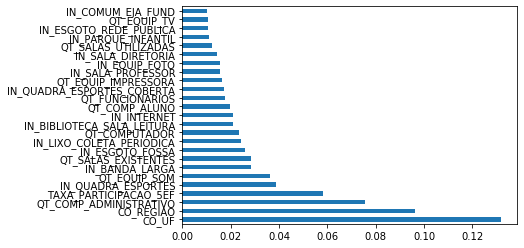

In [39]:
importances = pd.Series(RF_cls.feature_importances_, atributos)
importances.nlargest(25).plot(kind='barh')